# Chapter 2: Ising Model

<img src="ch02_fig01.jpg" alt="title" width="600px" />

## Motivation

**Ising model**: describes the evolution of a sistem of spin on a lattice with nearest-neighbours interactions.

A fundamental model in statistical mechanics.

Describes ferromagnetic systems, phase transitions, spin glasses.

We will simulate it with a basic Monte Carlo method. 



**Key advantages**:
- Simple, though accounts for a variety of complex phenomena. 
- Generalizable (multidimensions; neighbours interaction; ...)
- Applications: physics, material science, neuroscience, artificial neural networks, financial market, among others.
- Provides a hands-on example for a basic Monte Carlo simulation.

### Physics & Material Sciences

<img src="IM_Moving_Magnetic_Domains.gif" alt="title" width="600px" rotate="90" />

- ferromagnetism, magnetic phenomena

- phase transitions 

- spin glasses

**Note:** Giorgio Parisi was awarded the Nobel prize in physics for his contributions to the theory of spin glasses. 

Spin glasses are disordered systems with slow, many-timescale dynamics. 
They can model a variety of phenomena, from the dynamics of polymers to neural networks.

### Other disciplines

<img src="IM_Brain.png" alt="10.1155/2014/237898" width="600px" />

- Neuroscience: minimalistic model of neuronal activity 

- Artificial Neural Networks: Hopfield network (or: associative memory)

- Marine biology: minimalistic model of ice-water distribution on the sea (related to phase transition)

- Financial markets: Bornholdt's heterogeneous agent-based spin model 


## Application example: A Spin Glass Model of Path Integration in Rat Medial Entorhinal Cortex


[A Spin Glass Model of Path Integration in Rat Medial Entorhinal Cortex](https://www.jneurosci.org/content/26/16/4266)

<img src="IM_spinglass_model_network_activity_pattern_formation.png" alt="title" width="600px" />

## Kramers Transitions


System with three possible states: Left, Middle, Right.

$$
  \mathrm{Left} \quad  \Longleftrightarrow \quad \mathrm{Middle} \quad \Longleftrightarrow \quad \mathrm{Right}
$$

The energy of Left and Right states is 0 (*ground states*)

The energy of the Middle state is $E_{\rm b}$ (*energy barrier*)

### Statistical mechanics - fundamental concepts

Probability $p_i$ of a system to be in a state with energy $E_{i}$:

$$
    p_i = \frac{1}{Z} e^{-\frac{E_i}{k_{\rm B}T}}, 
$$

Partition function:

$$
Z=\sum\limits_i  e^{-\frac{E_i}{k_{\rm B}T}}
$$

## Simulation of the Kramers Transitions


We indicate with:

- 0 : the Left state
- 1 : the Middle state
- 2 : the Right state

At each step, the possible future states are only the present state and its neighboring states (e.g., a transition from Left to Right is not possible). 

We start from the Left state.

### Probability distribution

Implement a function to calculate the probability distribution given the energies of the possible states of the system.

In [1]:
import numpy as np 
    
def probability_distribution(Ei):
    """
    Function to generate the probability distribution for a system with states 
    with Ei energies.
    
    Parameters
    ==========
    Ei : Array (energies) [kBT].
    """
    
    Z = sum(np.exp(- Ei))  # Partition function.
    
    pi = 1 / Z * np.exp(- Ei)  # Probability.
    
    return pi, Z

Initialize the system

In [2]:
N = 3  # Number of states.
Eb = 2  # Energy barrier [kBT].

xi = np.arange(N)  # States.

Ei = np.array([0, Eb, 0])  # Energies.

pi, Z = probability_distribution(Ei)  # Partition function.

Plot the energy spectrum

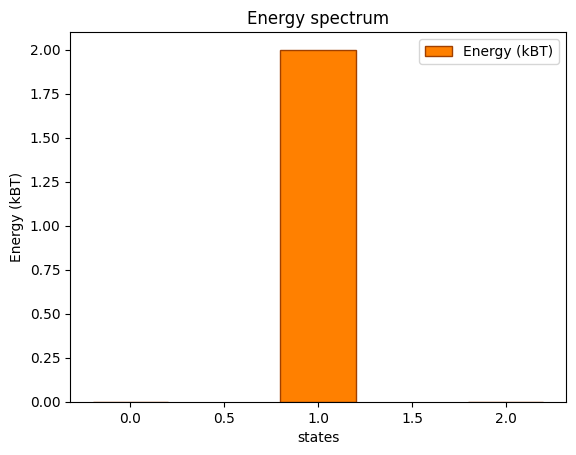

In [3]:
from matplotlib import pyplot as plt

plt.bar(xi, Ei, color='#FF8000', width=0.4, edgecolor='#A04000')
plt.legend(['Energy (kBT)'])

plt.title('Energy spectrum')

plt.xlabel('states')
plt.ylabel('Energy (kBT)')

plt.show()

Plot the probability distribution

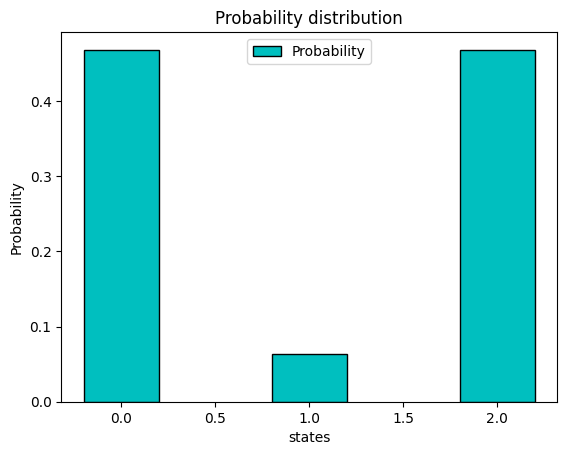

In [4]:
plt.bar(xi, pi, color='c', width=0.4, edgecolor='k')
plt.legend(['Probability'])

plt.title('Probability distribution')

plt.xlabel('states')
plt.ylabel('Probability')

plt.show()

### Transition

Implement a function that, given the current state, the probability distribution, and the transition rule, returns the state in the next time step.

In [5]:
def next_state_3(x, pi):
    """
    Function to generate the next state given the probability distribution and 
    the current state. 
    Specialized to the case of 3 states (0, 1, 2).
    
    Parameters
    ==========
    x  : current state (between 0 and 2)
    pi : probability distribution
    """
    
    if x not in (0, 1, 2):
        raise ValueError('x must be 0 or 1 or 2')
   
    p = np.random.rand()
    
    if p < pi[0]:
        x_next = 0
    elif p < pi[0] + pi[1]:
        x_next = 1
    else:
        x_next = 2
    
    if abs(x - x_next) > 1:
        x_next = x
            
    return x_next

Let the system evolve for a certain number of time steps.

In [6]:
N_steps = 500

x = np.zeros(N_steps); x[0] = 0
for i in range(N_steps - 1):
    x[i + 1] = next_state_3(x[i], pi)

Plot the evolution of the system state.

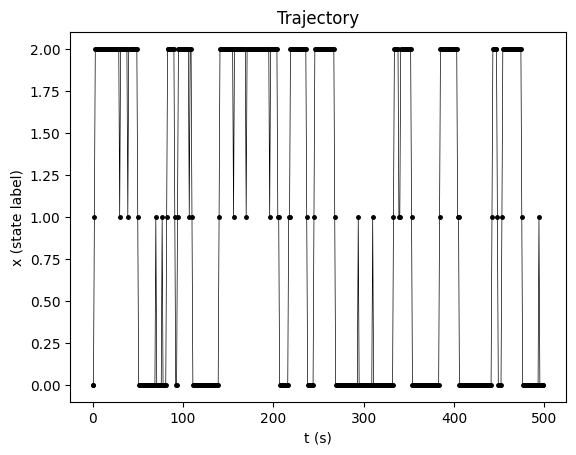

In [7]:
t = np.arange(N_steps)

plt.plot(t, x, ".-", color='k', markersize=5, linewidth=0.5)

plt.title('Trajectory')

plt.xlabel('t (s)')
plt.ylabel('x (state label)')

plt.show()

Plot the histogram of the state occupancy in the trajectory

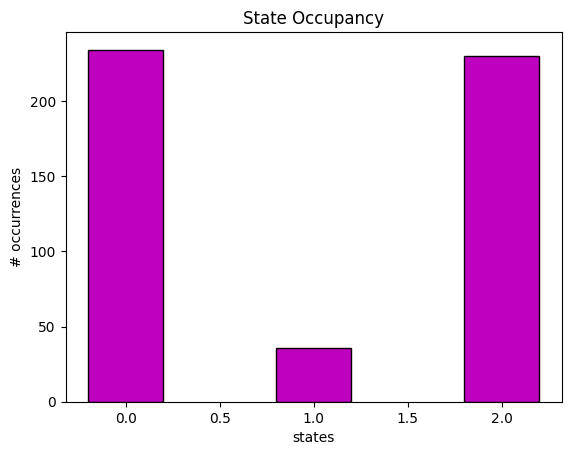

In [8]:
bins_edges = np.arange(4) - 0.5
occupancy = np.histogram(x, bins=bins_edges)

plt.bar(xi, occupancy[0], color='m', width=0.4, edgecolor='k')

plt.title('State Occupancy')

plt.xlabel('states')
plt.ylabel('# occurrences')

plt.show()

Plot experimental probability (obtained from the realized trajectory) and compare it with the *a priori* probability

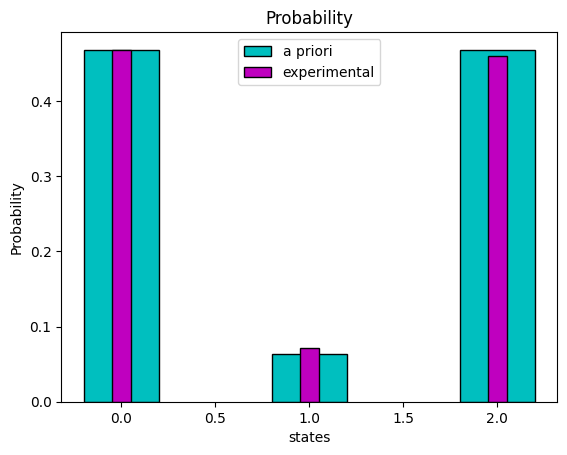

In [9]:
pi_exp = occupancy[0] / sum(occupancy[0])

plt.bar(xi, pi, color='c', width=0.4, edgecolor='k', label='a priori')
plt.bar(xi, pi_exp, color='m', width=0.1, edgecolor='k', label='experimental')
plt.legend()

plt.title('Probability')

plt.xlabel('states')
plt.ylabel('Probability')

plt.show()

## Ising Model

In the 2D Ising model, we have a suare lattice of spins.
Each spin can be *up* or *down*.

Spin in position $(i,j)$: $\sigma_{i,j}$

Possible values: $\sigma_{i,j} = \pm 1$

Interaction energy of spin in position $(i,j)$ with its fist neighbors:

$$
    E_{i,j} = - H \sigma_{i,j} - J \sigma_{i,j} \sum \sigma_{i\pm 1,j\pm 1},
$$

$H$: external field (usually: magnetic field)

$J$: spin-spin coupling

### Zero external field: $H = 0$

Let's simulate a system with $N \times N$ spins.

Initialization: random.

**Note:** assume $k_{\rm B}=1$ and $J=1$ in this task. No loss of generality.

In [10]:
N = 200  # Size of the splin lattice.
H = 0  # External field.
J = 1  # Spin-spin coupling.
T = 10  # Temperature. Temperatura critica ~2.269.

sl = 2 * np.random.randint(2, size=(N, N)) - 1

N_up = np.sum(sl + 1) / 2
N_down = N * N - N_up

print(f"Spin lattice created:  N_up={N_up}  N_down={N_down}")

Spin lattice created:  N_up=20010.0  N_down=19990.0


Write a function that returns the values of the neigbbors of the spin in position (i,j)

In [11]:
def neighboring_spins(i_list, j_list, sl):
    """
    Function returning the position of the neighbouring spins of a list of 
    spins identified by their positions in the spin lattice.
    
    Parameters
    ==========
    i_list : Spin position first indices.
    j_list : Spin position second indices.
    sl : Spin lattice.
    """

    Ni, Nj = sl.shape  # Shape of the spin lattice.
    
    # Position neighbors right.
    i_r = i_list  
    j_r = list(map(lambda x:(x + 1) % Nj, j_list))   

    # Position neighbors left.
    i_l = i_list  
    j_l = list(map(lambda x:(x - 1) % Nj, j_list))   

    # Position neighbors up.
    i_u = list(map(lambda x:(x - 1) % Ni, i_list))  
    j_u = j_list  

    # Position neighbors down.
    i_d = list(map(lambda x:(x + 1) % Ni, i_list)) 
    j_d = j_list   

    # Spin values.
    sl_u = sl[i_u, j_u]
    sl_d = sl[i_d, j_d]
    sl_l = sl[i_l, j_l]
    sl_r = sl[i_r, j_r]

    return sl_u, sl_d, sl_l, sl_r

Write a function that returns the energies of the possible states of the spin in position (i,j)

In [12]:
def energies_spins(i_list, j_list, sl, H, J):
    """
    Function returning the energies of the states for the spins in given 
    positions in the spin lattice.
    
    Parameters
    ==========
    i_list : Spin position first indices.
    j_list : Spin position second indices.
    sl : Spin lattice.
    """
    
    sl_u, sl_d, sl_l, sl_r = neighboring_spins(i_list, j_list, sl)
    
    sl_s = sl_u + sl_d + sl_l + sl_r 
    
    E_u = - H - J * sl_s
    E_d =   H + J * sl_s 
    
    return E_u, E_d

Write a function that returns the probabilities of the possible states of the spin in position (i,j)

In [13]:
def probabilities_spins(i_list, j_list, sl, H, J, T):
    """
    Function returning the energies of the states for the spins in given 
    positions in the spin lattice.
    
    Parameters
    ==========
    i_list : Spin position first indices.
    j_list : Spin position second indices.
    sl : Spin lattice.
    """
    
    E_u, E_d = energies_spins(i_list, j_list, sl, H, J)
    
    Ei = np.array([E_u, E_d])
    
    Z = np.sum(np.exp(- Ei / T), axis=0)  # Partition function.
    pi = 1 / np.array([Z, Z]) * np.exp(- Ei / T)  # Probability.

    return pi, Z       

### Simulation of time evolution for the Ising model

Each time step, we randomly choose $S$ spins ($S \ll N^2$).

For each spin, we calculate the possible energies of the configurations with spin up and down.

On the base of these energies, we randomly draw the status of each spin  in the next time step.

In [14]:
import random
import time
from tkinter import *

f = 0.05  # Number of randomly selected spins to flip-test.
N_skip = 10 # Visualize status every N_skip steps. 

window_size = 600

tk = Tk()
tk.geometry(f'{window_size + 20}x{window_size + 20}')
tk.configure(background='#000000')

canvas = Canvas(tk, background='#ECECEC')  # Generate animation window.
tk.attributes('-topmost', 0)
canvas.place(x=10, y=10, height=window_size, width=window_size)

Nspins = np.size(sl)  # Total number of spins in the spin lattice.
Ni, Nj = sl.shape

S = int(np.ceil(Nspins * f))  # Number of randomly selected spins.

step = 0

def stop_loop(event):
    global running
    running = False
tk.bind("<Escape>", stop_loop)  # Bind the Escape key to stop the loop.
running = True  # Flag to control the loop.
while running:
    ns = random.sample(range(Nspins), S)

    i_list = list(map(lambda x: x % Ni, ns)) 
    j_list = list(map(lambda x: x // Ni, ns)) 

    pi, Z = probabilities_spins(i_list, j_list, sl, H, J, T)

    rn = np.random.rand(S)
    for i in range(S):
        if rn[i] > pi[0, i]:
            sl[i_list[i], j_list[i]] = -1
        else:
            sl[i_list[i], j_list[i]] = 1

    # Update animation frame.
    if step % N_skip == 0:        
        canvas.delete('all')
        spins = []
        for i in range(Ni):
            for j in range(Nj):
                spin_color = '#FFFFFF' if sl[i,j] == 1 else '#000000'
                spins.append(
                    canvas.create_rectangle(
                        j / Nj * window_size, 
                        i / Ni * window_size,
                        (j + 1) / Nj * window_size, 
                        (i + 1) / Ni * window_size,
                        outline='', 
                        fill=spin_color,
                    )
                )
        
        tk.title(f'Iteration {step}')
        tk.update_idletasks()
        tk.update()
        time.sleep(0.1)  # Increase to slow down the simulation.

    step += 1

tk.update_idletasks()
tk.update()
tk.mainloop()  # Release animation handle (close window to finish).